# PROJET NUMERIQUE 2

***Réalisé par Louis Beauval et Tasnim Kazi Tani***

***Janvier 2020***

***Imports préalables***

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import autograd
import autograd.numpy as np

**Question 1**

$\alpha$ représente le taux de reproduction des proies en abscence de prédateur tandis que -$\beta$ représente 
le taux de mortalité dû à la présence des prédateurs. De même, -$\gamma$ représente le taux de mortalité des 
prédateurs en l'abscence de proies alors que $\delta$ représente la taux de reproduction des prédateur en présence de proie.

Les points d'équilibre sont les points $(x_1,x_2)$ où la fonction f s'annule avec :
$$
                            f : (x_1,x_2) -> (x_1(\alpha -\beta \times x_2), -x_2(\gamma - \delta \times x_1))
$$

En résolvant ce système on trouve deux points : $(0,0)$ et ($\alpha/\beta$, $\gamma/\delta$).

Pour regarder la stabilité de ces points on utilise le lien avec le linéarisé tengeant. On calcule donc la 
Jacobienne de f en chaque point d'équilibre.
$$
J_f(0,0) = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma \end{pmatrix}
$$
Cette matrice à au moins une valeur propre à partie réelle positive donc ce point est instable.

$$
J_f(\alpha/\beta, \gamma/\delta) = \begin{pmatrix} \alpha - \frac{\beta\gamma}{\delta}  & -\alpha \\ \gamma & -\gamma + \frac{\delta \alpha}{\beta} \end{pmatrix}
$$

Les valeurs propres de cette matrice sont:

$$
\lambda = \pm i\sqrt{\alpha\gamma}
$$

On ne peut donc rien conclure sur la stabilité globale de $\bar x$.

**Question 2**

Nous créons d'abord la grille avec les valeurs $x_1$ (X) en abscisse et $x_2$ (Y) en ordonnée à l'aide de la fonction meshgrid.
Nous représentons le champ de vecteur de la fonction f sur cette grille pour des valeurs de $\alpha, \beta, \gamma, \theta$ 
respectivement égales à $2/3$, $4/3$, $1$ et $1$. (graphe 1) 

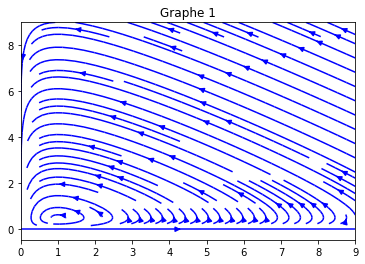

In [46]:
x1 = np.arange(0,10,1)
x2 = np.arange(0,10,1)
X,Y = np.meshgrid(x1,x2)

def f(x1,x2):
    alpha = 2/3
    beta = 4/3
    gamma = 1
    delta = 1
    return np.array([x1*(alpha - beta*x2), -x2*(gamma - delta*x1)])

U, V = f(X,Y)[0], f(X,Y)[1]


fig, ax = plt.subplots()
q = ax.streamplot(X, Y, U, V, color='blue')


plt.title("Graphe 1")

plt.show()

Nous obtenons donc un portrait de phase circulaire.

***Question 3***

Raisonnons par l'absurde en supposant qu'une solution $x(t)$ initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sort
de ce domaine à un instant  $t_0 > 0 $ donné. Prenons par exemple à cet instant-là $x_1(t_0)=0$.

Nous savons que : $\forall t\geq 0 ,\ \ x(t) = (0,x_{20}\exp(-\gamma t))$ est solution et que $x_1(t_0)=0$.

Or, on a vu à la question 1 que f est continue et continument différentiable en $x \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.
D'après le théorème de Cauchy-Lipschitz, il y a alors une unique solution maximale au problème initialisé en $t=0$.

Donc $x(t) = (0,x_{20}\exp(-\gamma t)) \ \forall t\geq 0 $ est la seule solution possible ce qui est incompatible avec une initialisation dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Par l'absurde on trouve que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

***Question 4***

$$
\partial H = \frac{\partial H}{\partial x_1} + \frac{\partial H}{\partial x_2} \newline
$$
$$
\partial H = \dot x_1(\delta - \frac{\gamma}{x_1}) + \dot x_2(\beta - \frac{\alpha}{x_2}) \newline
$$
$$
\partial H = (\alpha - \beta x_2)(\delta x_1 - \gamma) + (\beta x_2 -\alpha)(\delta x_1 - \gamma)\newline
$$
$$
\partial H = 0
$$

 

Nous pouvons en déduire que les solutions maximales $x(t)$ sont bornées. En effet, dans le cas contraire on aurait $H(x(t))$ qui divergerait et donc $\partial H \ne 0$.

Pour rappel, ici $f$ est définie sur $J\times\mathbb{R}_{>0}\times\mathbb{R}_{>0}$. Avec $J$ un ouvert de $\mathbb{R}$ . Nous
choisissons de prendre $J$ = $\mathbb{R}$.

 
Nous savons que toute solution maximale est définie sur un intervalle ouvert $]t_{m-},t_{m+}[$ que nous cherchons à définir. 

Si $t_{m-}$ est fini, le théorème du domaine maximale d'existence nous dit qu'on a soit $x(t)$ qui diverge en temps fini soit
$(t,x(t))$ qui tend vers la frontière de $\mathbb{R}\times\mathbb{R}_{>0}\times\mathbb{R}_{>0}$.

Or on a dit que $x(t)$ était bornée donc la première situation ne peut être vérifiée et $(t,x(t))$ ne peut atteindre $-\infty$
ou $+\infty$ car $x(t)$ est bornée et $t_{m-}$ est fini. De plus, $(t,x(t))$ ne peut atteindre $0$ car nous avons dit que $x(t)$ était à valeur dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ à la question précédente.

Nous avons donc $t_{m-}$ non fini.                                                                                            

Le même raisonnement peut être appliqué avec $t_{m+}$.                                                                                                                                                                  

***Question 5***

In [47]:
#pour représenter les courbes de niveau de H
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    return( plt.show() )

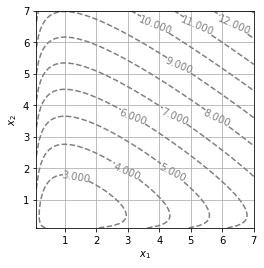

In [48]:
#la fonction H en question
def H(x1,x2):
    alpha = 2/3
    beta = 4/3
    gamma = 1
    theta = 1
    return theta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)


#on appelle la fonction pour tracer les courbes de niveau

display_contour(
    H, 
    x=np.linspace(0.1, 7, 100), 
    y=np.linspace(0.1, 7, 100), 
    levels=10 # 10 levels, automatically selected
)

Avec ces coefficients, on a $\bar{x} = (1/2,1)$. On constate donc $\bar{x}$ qui n'est pas sur les courbes de niveau de $H$ mais au centre de toutes les courbes de niveau. Cela montre que les solutions $x_2(t)$ et $x_1(t)$ oscillent autours de cette valeur.
Il s'agit donc d'un point d'équilibre stable. 

***Question 6***

On teste la fonction sur une équation connue:
$$
\dot x(t) = 2\times x(t)
$$

dont les solutions sont de la forme:
$$
x(t) = \exp(2t)
$$

In [49]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    j = int((tf-t0)/dt)
    x = x0
    t = t0
    X, T = [], []

    for i in range(j):
        x = x + dt*f(x, t)
        t = t + dt
        X.append(x)
        T.append(t)
    
    return X, T


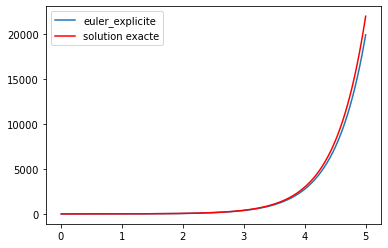

In [50]:
def f(x, t):
    return 2*x


coo = solve_euler_explicit(f, 1, 0.01, 0, 5)
np.shape(coo)

plt.plot(coo[1], coo[0], label = 'euler_explicite')
plt.plot(coo[1], np.exp([2*e for e in coo[1]]), label = 'solution exacte', color= 'r')
plt.legend()
plt.show()

Graphiquement, nous observons bien que la méthode d'Euler explicit permet de retrouver la solution de l'équation différentielle
$x'(t) = 2x$.

Nous allons maintenant vérifier la convergence lorsque dt tend vers 0 :

In [51]:
def convergence(epsilon,dt):
    diff = [1000]
    while max(diff) > epsilon:
        coo = solve_euler_explicit(f, 1, dt, 0, 1)
        newdiff = [0 for i in range(len(coo[0]))]
        for i in range (len(coo[0])):
            newdiff[i] = abs((coo[0][i] - np.exp(2*coo[1][i])))
        diff = newdiff        
        dt = dt/2
        
    return f'convergence for max(x_j - x(t=j)) = {max(diff)} with dt = {dt}'




In [52]:
#rentrer une valeur souhaitée pour epsilon
epsilon = 1

convergence(epsilon, dt=1)


'convergence for max(x_j - x(t=j)) = 0.8058059269032274 with dt = 0.03125'

En partant d'un $dt = 1$ on a bien convergence pour un dt plus proche de 0.

Nous allons maintenant essayer de visualiser graphiquement l'ordre de convergence en traçant l'erreur en fonction du pas
de temps :

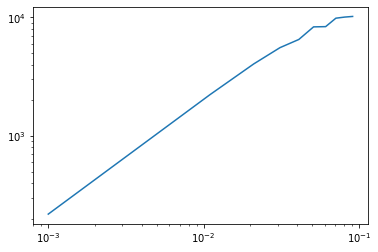

In [53]:
def ordre_convergence(dt):
    #dt doit être une liste de valeurs
    liste = []
    for i in dt:
        coo = solve_euler_explicit(f, 1, i, 0, 5)
        for j in range(len(coo[0])):
            erreur = np.max(abs(coo[0][j] - np.exp(2*coo[1][j])))
        liste.append(erreur)
        
    return liste

ordre_convergence(np.arange(0.001,0.1,0.01))

plt.loglog(np.arange(0.001,0.1,0.01), ordre_convergence(np.arange(0.001,0.1,0.01)),)
plt.show()

Lorsque l'on trace l'erreur entre la méthode de résolution Euler explicite et les vraies valeurs de la fonction exponentielle
on obtient une droite ce qui montre que l'ordre de convergence est de 1.

***Question 7***

On définit la fonction de Lotka-Volterra et on trace $x_1$ et $x_2$:

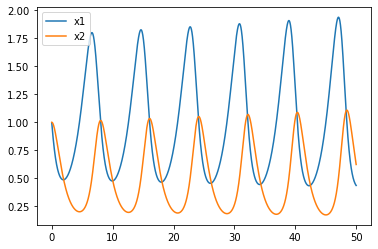

In [54]:
def LV(x,t):

    return np.array([x[0]*(alpha - beta*x[1]), -x[1]*(gamma - delta*x[0])])

coo = solve_euler_explicit(LV, np.array([1,1]), 0.01, 0, 50)



plt.plot(coo[1],[e[0] for e in  coo[0]], label="x1")

plt.plot(coo[1], [e[1] for e in coo[0]], label="x2")

plt.legend()

plt.show()

On constate un comportement périodique cohérent: lorsque les prédateurs sont en excès, les proies diminuent fortement, puis il s'ensuit une grande diminution des prédateurs qui ne pvent plus se nourrir, ce qui amène finalement les proies à proliférer de nouveau. 
Cependant, nous notons une légère augmentation de la population au fur et à mesur ce qui n'est pas concordant avec $x(t)$ bornée.

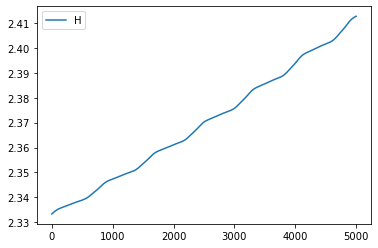

In [55]:
from math import *

def H(x1, x2):
    alpha = 2/3
    beta = 4/3
    gamma = 1
    delta = 1
    return delta*np.asarray(x1) -gamma*np.log(x1) + beta*np.asarray(x2) - alpha*np.log(x2)

x1 = [e[0] for e in  coo[0]]
x2 = [e[1] for e in coo[0]]

conservation = H(x1,x2)
plt.plot(conservation, label = 'H')
plt.legend()
plt.show()

Nous constatons qu'au lieu d'obtenir $H(t)$ constant le long des solutions, nous obtenons une fonction qui augmente 
très légèrement (de 2.33 à 2.41) pour de grandes valeurs de $x(t)$ montrant ainsi les limites de la méthode d'Euler explicite.

***Question 8***

Nous allons maintenant coder la méthode d'euler implicite :

In [56]:
alpha = 2/3
beta = 4/3
gamma = 1
delta = 1


def solve_euler_implicit(f, x0, dt, t0, tf, itermax ):
    x = x0
    t = t0
    epsilon = 0.01
    coo = solve_euler_explicit(f, x0, dt, t0, tf)
    liste_x = []
    liste_t = coo[1][1::]
    
    for i in range(1, len(coo[0])):
        
        def F(x,t):
            return coo[0][i-1] + dt*f(x,t+dt)

        a = coo[0][i]
        success = False
        for k in range(itermax):
            

            if np.linalg.norm((F(a,t)-a)/(coo[0][i])) > epsilon :
                a = F(a,t)
            else:
                success = True
                
            
        if success == False:
            raise ValueError(f"No convergence in {itermax} steps")
            
        t = t + dt
        liste_x.append(F(a,t))
        
        
        
    return liste_x, liste_t
    


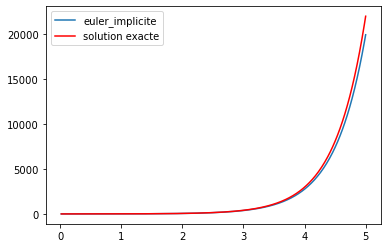

In [57]:
def f(x, t):
    return 2*x

coo2 = solve_euler_implicit(f, 1, 0.01, 0, 5, 10)
plt.plot(coo2[1], coo2[0], label = 'euler_implicite')
plt.plot(coo2[1], np.exp([2*e for e in coo2[1]]), label = 'solution exacte', color= 'r')
plt.legend()
plt.show()

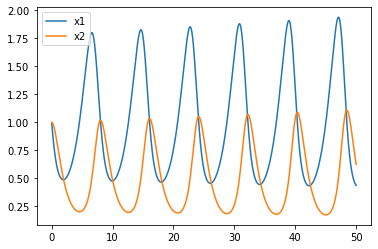

In [58]:
coo3 = solve_euler_implicit(LV, np.array([1,1]), 0.01, 0, 50, 1000)
plt.plot(coo3[1],[e[0] for e in  coo3[0]], label="x1")

plt.plot(coo3[1], [e[1] for e in coo3[0]], label="x2")

plt.legend()

plt.show()

Les résultats sont similaires à ceux obtenus avec la fonction d'euler explicite ce qui confirme que cette méthode a fonctionné.

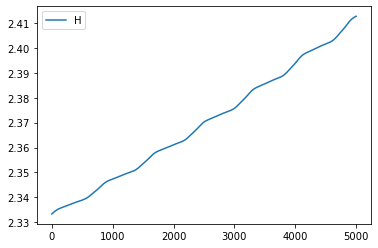

In [59]:
def H(x1, x2):
    alpha = 2/3
    beta = 4/3
    gamma = 1
    delta = 1
    return delta*np.asarray(x1) -gamma*np.log(x1) + beta*np.asarray(x2) - alpha*np.log(x2)

x1 = [e[0] for e in  coo[0]]
x2 = [e[1] for e in coo[0]]

conservation = H(x1,x2)
plt.plot(conservation, label = 'H')
plt.legend()
plt.show()

Avec la méthode d'Euler implicite, le même biais sur les valeurs de $H(x(t))$ est observé avec une augmentation constante
de $H(x(t))$ le long des solutions. 

***Question 9***

Notons $S_f$ le système d'équations de la question 3, associé à la fonction $f$ et $S_g$ celui associé à $g$ avec:
$$
f:(x_1,x_2) \to (x_1(\alpha -\beta \times x_2),  - x_2(\gamma - \delta \times x_1)) \\
$$
$$
g:(x_1,x_2) \to (x_1(\alpha -\beta \times x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0), - x_2(\gamma - \delta \times x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0))
$$

Soit $x_a(t)$ la solution maximale de $S_f$.
D'après la question 3, $H(x(t))$ est constante le long des solutions de l'équation différentielle alors si $H(x(t=0))=H_0$ on a:
$$
\forall t \in \mathbb{R} \ \ H(x(t)) = H_0
$$ pour chaque solution $x(t)$ et donc pour $x_a(t)$ aussi.
De ce fait, on a alors pour chaque solution $x(t)$:

$$
f(x(t)) = (x_1(\alpha -\beta \times x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0), - x_2(\gamma - \delta \times x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0))
$$

Donc si $x_a(t)$ est la solution maximale de $S_f$ elle est aussi solution de cette nouvelle expression ci-dessus, donc $x_a$ est solution du probleme de Cauchy $S_g(t_0,x_0)$. De plus $x_a$ est solution maximale et comme $u_1$ et $u_2$ sont continûments différentiables, g est continûment différentiable, donc par théorème de Cauchy-Lipchitz, $x$ est la solution maximale de $S_g(t_0,x_0)$.

***Question 10***

Le calcul de la dérivée de $H-H_0$ le long des solutions de ce nouveau système nous donne :

$$
\frac{d}{dt}(H(x(t))-H_0) = -(H-H_0)\left(u_1(\delta - \frac{\gamma}{x_1})+u_2(\beta - \frac{\alpha}{x_2})\right)
$$

De même, après calcul on obtient:

$$
||\nabla(H(x(t)))||^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2
$$

Donc, en choisissant $u_1 = k(\delta - \frac{\gamma}{x_1})$ et $u_2 = k(\beta - \frac{\alpha}{x_2})$ on obtient bien l'égalité attendue.

 

De plus, en notant $h(t)= (H(x(t))-H_0)$ et $g(t)= ||\nabla(H(x(t)))||^2$ on a que h vérifie l'équation différentielle:

$$
\dot h(t)= -k\times g(t)\times h(t)
$$
$$
\implies h(t) = \exp(-kG(t)) 
$$

où $G$ est une primitive de $g$.

Or par énoncé, $x$ reste à une distance strictement positive de $\bar x$ donc $||\nabla(H(x(t)))||^2 \geq \epsilon$ avec $\epsilon > 0$, un minorant de $g$.

Donc:

$$
G(t) = [\int_t_{0}^{t} g(t) \, dt] \geq (t-t_0)\epsilon
$$


$$
\implies -kG(t) \leq -k(t-t_0)\epsilon \newline
$$
$$
\implies 0 \leq h(t) \leq \exp( -k(t-t_0)\epsilon)
$$

Or $lim_{t \to +\infty} \exp( -k(t-t_0)\epsilon) =  0$ donc on a que $h(t)$ tend vers 0 en l'infini et donc que $H$ converge exponentiellement vers $H_0$.

***Question 11***

Dans le schéma d'Euler, il faut calculer le gradient $\nabla H(x_i)$ à chaque étape et retirer $k\nabla H(x_i)(H(x_i) - H(x_0))$. 
$k$ contrôle la vitesse de convergence vers $H_0$ et donc la stabilité de $H$. On ne peut cependant pas choisir un $k$ trop 
grand. En effet, calculons au premier ordre $H(x^{j+1}) - H_0$ en fonction de $H(x^j) - H_0$. 
On pose $h : t \mapsto H(x(t))$. Avec $x(t_j) = x^j$ ici, on a alors :
$$ 
h(t_{j+1}) = h(t_j) + \frac{dh}{dt}(t_j)*(t_{j+1} - t_j) + o(t_{j+1} - t_j) 
$$

C'est à dire :
$$ 
H(x^{j+1}) - H_0 = H(x^j) - H_0 + \frac{d(H(x(t)) - H_0)}{dt}(x^j)*dt 
$$
au 1er ordre en $dt$. 

En appliquant ce que l'on a obtenu juste avant :
$$ 
H(x^{j+1}) - H_0 = H(x^j) - H_0 - k\|\nabla H(x^j)\|^2 (H(x^j) - H_0)dt  \\ = (H(x^j) - H_0)(1 - k \|\nabla H(x^j)\|^2dt)
$$

On passe à la valeur absolue :
$$
|H(x^{j+1}) - H_0| = |H(x^j) - H_0||1 - k \|\nabla H(x^j)\|^2dt| 
$$

On cherche à réduire la distance entre $H(x^{j+1})$ et $H_0$, on doit alors avoir $|1 - k \|\nabla H(x^j)\|^2dt|$ , $1$. 
Ainsi : $k$ doit être positif et $k \|\nabla H(x^j)\|^2dt$; $2$, d'où :

$$ 
k frac{2}{\|\nabla H(x^j)\|^2dt} 
$$

En conclusion, $k$ ne peut pas être arbitrairement grand : avec $dt$ suffisamment petit, on pourra cependant prendre des $k$ 
assez grands.